In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
domestic16 = pd.read_csv('domestic_visitors_2016.csv')
domestic17 = pd.read_csv('domestic_visitors_2017.csv')
domestic18 = pd.read_csv('domestic_visitors_2018.csv')
domestic19 = pd.read_csv('domestic_visitors_2019.csv')

## Let's check the data quality

In [3]:
domestic16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  372 non-null    object
 1   date      372 non-null    object
 2   month     372 non-null    object
 3   year      372 non-null    int64 
 4   visitors  372 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.7+ KB


### If we can look at the data randomly we'll see some missing values in visitors columns but the previous cell says there's no missing values, that means those are empty strings

In [4]:
domestic16.sample(20)

,district,date,month,year,visitors
210,Nalgonda,01-07-2016,July,2016,582820
339,Warangal (Rural),01-04-2016,April,2016,
181,Medchal,01-02-2016,February,2016,
313,Vikarabad,01-02-2016,February,2016,
348,Warangal (Urban),01-01-2016,January,2016,1985815
57,Jangaon,01-10-2016,October,2016,14770
363,Yadadri Bhongir,01-04-2016,April,2016,
87,Kamareddy,01-04-2016,April,2016,
8,Adilabad,01-09-2016,September,2016,491279
297,Siddipet,01-10-2016,October,2016,123500


### Let's look at the next year domestic data
### So as we can see it's the same issue

In [5]:
domestic17.sample(10)

,district,date,month,year,visitors
109,Khammam,01-02-2017,February,2017,115470
349,Warangal (Urban),01-02-2017,February,2017,126608
100,Karimnagar,01-05-2017,May,2017,8890
345,Warangal (Rural),01-10-2017,October,2017,16500
229,Nizamabad,01-02-2017,February,2017,1752
69,Jayashankar Bhoopalpally,01-10-2017,October,2017,115250
140,Mahabubabad,01-09-2017,September,2017,13140
237,Nizamabad,01-10-2017,October,2017,6644
129,Komaram Bheem Asifabad,01-10-2017,October,2017,14050
57,Jangaon,01-10-2017,October,2017,16130


### We'll just merg all the domestic data together

In [6]:
pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


## Save in a single dataframe

In [7]:
domestic = pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

## Now we'll do the same thing for the foreign visitors dataframes

In [8]:
foreign16 = pd.read_csv('foreign_visitors_2016.csv')
foreign17 = pd.read_csv('foreign_visitors_2017.csv')
foreign18 = pd.read_csv('foreign_visitors_2018.csv')
foreign19 = pd.read_csv('foreign_visitors_2019.csv')

## As we can see there's some missing values prresent here as well

In [9]:
foreign16.sample(20)

,district,date,month,year,visitors
204,Nalgonda,01-01-2016,January,2016,0
54,Jangaon,01-07-2016,July,2016,
197,Nagarkurnool,01-06-2016,June,2016,
55,Jangaon,01-08-2016,August,2016,
125,Komaram Bheem Asifabad,01-06-2016,June,2016,
239,Nizamabad,01-12-2016,December,2016,0
0,Adilabad,01-01-2016,January,2016,2
162,Mancherial,01-07-2016,July,2016,
69,Jayashankar Bhoopalpally,01-10-2016,October,2016,24
231,Nizamabad,01-04-2016,April,2016,0


## Let's join them together

In [10]:
foreign = pd.concat([foreign16,foreign17,foreign18,foreign19],ignore_index=True)

## To check the data types of each column

In [11]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


## Data cleaning: Get rid of the missing values and empty strings

In [12]:
domestic.query("visitors.notna() and visitors != ' '")

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [13]:
domestic_clean = domestic.query("visitors.notna() and visitors != ' '").copy()

In [14]:
foreign_clean = foreign.query("visitors.notna() and visitors != ' '").copy()

## To check if still there's any missing values

In [15]:
domestic_clean.query("visitors.isna() == True")

,district,date,month,year,visitors


In [16]:
foreign_clean.query("visitors.isna() == True")

,district,date,month,year,visitors


## To change the visitor number as integers

In [17]:
domestic_clean['visitors'] = domestic_clean['visitors'].astype(int)

In [18]:
foreign_clean['visitors'] = foreign_clean['visitors'].astype(int)

In [19]:
domestic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1167 non-null   object
 1   date      1167 non-null   object
 2   month     1167 non-null   object
 3   year      1167 non-null   int64 
 4   visitors  1167 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 50.1+ KB


In [20]:
foreign_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1192 non-null   object
 1   date      1192 non-null   object
 2   month     1192 non-null   object
 3   year      1192 non-null   int64 
 4   visitors  1192 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 51.2+ KB


## To get the top districts visitor wise

In [21]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Sangareddy                  10424510
Karimnagar                   9462383
Khammam                      9378315
Nagarkurnool                 7424355
Adilabad                     7321575
Jogulamba Gadwal             6813340
Nalgonda                     6401933
Siddipet                     5775285
Mulugu                       1819800
Wanaparthy                    890078
Mancherial                    867242
Jangaon                       826280
Warangal (Rural)              819162
Mahabubabad                   600697
Narayanapet                   389250
Nizamabad                     116147
Komaram Bheem Asifabad       

In [22]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: visitors, dtype: int32

## Let's plot the districts

<Axes: xlabel='district'>

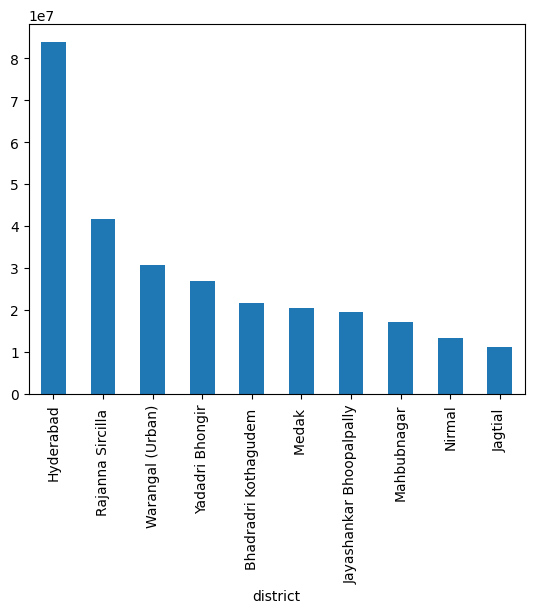

In [23]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

## If we wanna plot them horizontally

<Axes: ylabel='district'>

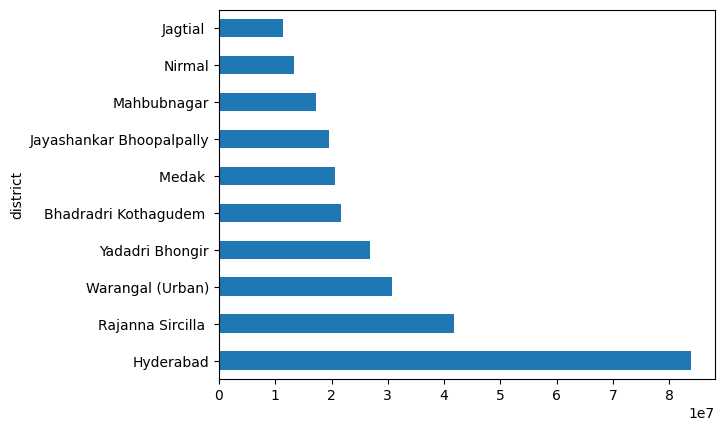

In [24]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

## To get the highest value on the top

<Axes: ylabel='district'>

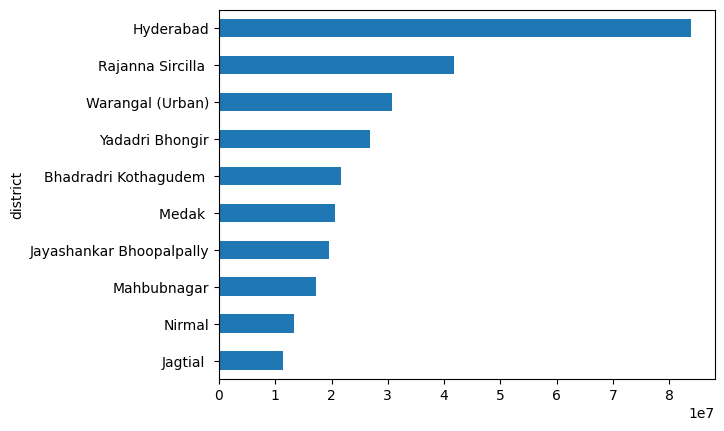

In [25]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)[::-1].plot(kind='barh')

In [26]:
top_10_domestic_districts = domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)[::-1]

## To adjust the colors and make it visually apealing

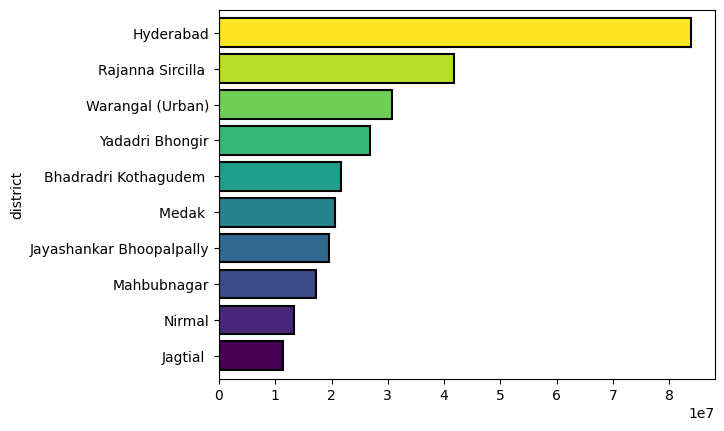

In [27]:
top_10_domestic_districts.plot(
    kind='barh',
    color=plt.cm.viridis(np.linspace(0, 1, len(top_10_domestic_districts))),
    edgecolor='black',
    linewidth=1.5,
    width=0.8
)
plt.show()

## Question 2: List down the top three districts based on compounded annual growth rate(CAGR) of visitors
![alt text](CARG_formula-1.JPG)

### To calculate the CAGR we need the begining value(total visitors in 2016 in each district) and final value(total visitors in 2019 in each district)

### First of all we need to merge these two dataset to calculate the overall CAGR

In [28]:
pd.concat([domestic_clean,foreign_clean],ignore_index=True)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
2354,Yadadri Bhongir,01-08-2019,August,2019,0
2355,Yadadri Bhongir,01-09-2019,September,2019,0
2356,Yadadri Bhongir,01-10-2019,October,2019,0
2357,Yadadri Bhongir,01-11-2019,November,2019,0


## Now to get the total number of visitors we'll do groupby on the basis of multiple columns

In [29]:
pd.concat([domestic_clean,foreign_clean],ignore_index=True).groupby(['district','date','month','year'], as_index=False)['visitors'].sum()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792138
1,Adilabad,01-01-2017,January,2017,318804
2,Adilabad,01-01-2018,January,2018,320356
3,Adilabad,01-01-2019,January,2019,25071
4,Adilabad,01-02-2016,February,2016,937820
...,...,...,...,...,...
1198,Yadadri Bhongir,01-11-2019,November,2019,365990
1199,Yadadri Bhongir,01-12-2016,December,2016,462800
1200,Yadadri Bhongir,01-12-2017,December,2017,481075
1201,Yadadri Bhongir,01-12-2018,December,2018,606510


## Let's save this dataframe

In [30]:
merge_df = pd.concat([domestic_clean,foreign_clean],ignore_index=True).groupby(['district','date','month','year'], as_index=False)['visitors'].sum()

## Now we'll apply pivot tale to get the total number of visitors at the end of each year

In [31]:
merge_pivot = merge_df.pivot_table(values='visitors',index='district',columns='year',aggfunc='sum')

In [32]:
merge_pivot

year,2016,2017,2018,2019
district,,,,
Adilabad,5075567.0,825391.0,644748.0,775901.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23558336.0,27407421.0,19858439.0,14121662.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40662.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243486.0,1831592.0,16896464.0,662575.0
Jogulamba Gadwal,523446.0,2245704.0,2036845.0,2008290.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


## Get rid of missing values

In [33]:
merge_pivot.dropna()

year,2016,2017,2018,2019
district,,,,
Adilabad,5075567.0,825391.0,644748.0,775901.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23558336.0,27407421.0,19858439.0,14121662.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40662.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243486.0,1831592.0,16896464.0,662575.0
Jogulamba Gadwal,523446.0,2245704.0,2036845.0,2008290.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


In [34]:
merge_pivot = merge_pivot.dropna().copy()

In [35]:
merge_pivot.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Adilabad to Yadadri Bhongir
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    28 non-null     float64
 1   2017    28 non-null     float64
 2   2018    28 non-null     float64
 3   2019    28 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


In [36]:
merge_pivot.head()

year,2016,2017,2018,2019
district,,,,
Adilabad,5075567.0,825391.0,644748.0,775901.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23558336.0,27407421.0,19858439.0,14121662.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40662.0,165708.0,291022.0,328890.0


In [37]:
for i in merge_pivot.index:
    start_value = merge_pivot.loc[i,2016]
    end_value = merge_pivot.loc[i, 2019]
    print(start_value)
    print(end_value)
    break

5075567.0
775901.0


## So we'll run a loop which is gonna iterate through each value in the district and get the value for 2019 and 2016 and calculate the difference and store it inside a dictionary

In [38]:
cagr = {}
for district in merge_pivot.index:
    start_value = merge_pivot.loc[district, 2016]
    end_value = merge_pivot.loc[district, 2019]
    if pd.notna(start_value) and pd.notna(end_value) and start_value > 0: # if any district has no visitors we'll skip it
        cagr[district] = ((end_value / start_value) ** (1/3)) - 1

In [39]:
cagr

{'Adilabad': -0.46530361384684293,
 'Bhadradri Kothagudem ': 1.433875243991837,
 'Hyderabad': -0.1568327419445058,
 'Jagtial ': 0.7046038372423757,
 'Jangaon ': 1.0073386385873375,
 'Jayashankar Bhoopalpally': 0.39611228943814747,
 'Jogulamba Gadwal ': 0.5654943820640341,
 'Kamareddy ': 0.6140333794567416,
 'Karimnagar ': -0.7962955009992503,
 'Khammam': -0.34391989466989636,
 'Mahabubabad ': 0.029777849472204965,
 'Mahbubnagar': -0.32668810621051725,
 'Mancherial': 2.25803738944244,
 'Medak ': 0.1633432982468157,
 'Nagarkurnool ': 0.5265432082247823,
 'Nalgonda': -0.7113348807658993,
 'Nirmal': 0.6088075773938375,
 'Nizamabad': 0.9303068771462331,
 'Peddapalli': 0.7225689895442873,
 'Rajanna Sircilla ': 0.9774858257457022,
 'Sangareddy ': 0.8020953731607485,
 'Siddipet': 1.027671552477179,
 'Wanaparthy ': 0.7060791702501732,
 'Warangal (Rural)': 1.6314546875673206,
 'Warangal (Urban)': -0.5884517885082573,
 'Yadadri Bhongir': 0.3745601828345997}

## Now we'll convert this dictionary into a dataframe

In [40]:
list(cagr.items())

[('Adilabad', -0.46530361384684293),
 ('Bhadradri Kothagudem ', 1.433875243991837),
 ('Hyderabad', -0.1568327419445058),
 ('Jagtial ', 0.7046038372423757),
 ('Jangaon ', 1.0073386385873375),
 ('Jayashankar Bhoopalpally', 0.39611228943814747),
 ('Jogulamba Gadwal ', 0.5654943820640341),
 ('Kamareddy ', 0.6140333794567416),
 ('Karimnagar ', -0.7962955009992503),
 ('Khammam', -0.34391989466989636),
 ('Mahabubabad ', 0.029777849472204965),
 ('Mahbubnagar', -0.32668810621051725),
 ('Mancherial', 2.25803738944244),
 ('Medak ', 0.1633432982468157),
 ('Nagarkurnool ', 0.5265432082247823),
 ('Nalgonda', -0.7113348807658993),
 ('Nirmal', 0.6088075773938375),
 ('Nizamabad', 0.9303068771462331),
 ('Peddapalli', 0.7225689895442873),
 ('Rajanna Sircilla ', 0.9774858257457022),
 ('Sangareddy ', 0.8020953731607485),
 ('Siddipet', 1.027671552477179),
 ('Wanaparthy ', 0.7060791702501732),
 ('Warangal (Rural)', 1.6314546875673206),
 ('Warangal (Urban)', -0.5884517885082573),
 ('Yadadri Bhongir', 0.374560

In [41]:
cagr_df = pd.DataFrame(list(cagr.items()), columns=['district', 'CAGR'])

In [42]:
cagr_df

,district,CAGR
0,Adilabad,-0.465304
1,Bhadradri Kothagudem,1.433875
2,Hyderabad,-0.156833
3,Jagtial,0.704604
4,Jangaon,1.007339
5,Jayashankar Bhoopalpally,0.396112
6,Jogulamba Gadwal,0.565494
7,Kamareddy,0.614033
8,Karimnagar,-0.796296
9,Khammam,-0.343920


## Now we can easily sort this dataframe

In [43]:
cagr_df.sort_values(by='CAGR',ascending=False).head(3)

,district,CAGR
12,Mancherial,2.258037
23,Warangal (Rural),1.631455
1,Bhadradri Kothagudem,1.433875


## Now we can create a function to calculate the CAGR for domestic and foreign visitors district wise

In [44]:
def calculate_cagr(df):
    cagr_df_pivot = df.pivot_table(values='visitors', index='district', columns='year', aggfunc='sum')

    cagr = {}
    for district in cagr_df_pivot.index:
        start_value = cagr_df_pivot.loc[district, 2016]
        end_value = cagr_df_pivot.loc[district, 2019]
        if pd.notna(start_value) and pd.notna(end_value) and start_value > 0:
            cagr[district] = ((end_value / start_value) ** (1/3)) - 1
            
    cagr_df = pd.DataFrame(list(cagr.items()), columns=['district', 'CAGR'])
    return cagr_df.sort_values(by='CAGR',ascending=False).head(3).set_index(keys='district')

top_3_cagr_district = calculate_cagr(merge_df)

In [45]:
top_3_cagr_district

,CAGR
district,
Mancherial,2.258037
Warangal (Rural),1.631455
Bhadradri Kothagudem,1.433875


<Axes: xlabel='district'>

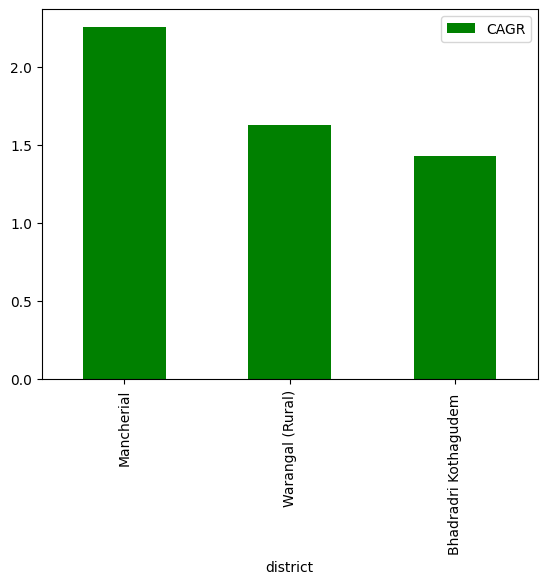

In [46]:
top_3_cagr_district.plot(kind='bar',color='green')

## List down the bottom 3 districts, the districts that are declining

In [47]:
cagr_df.sort_values(by='CAGR').head(3)

,district,CAGR
8,Karimnagar,-0.796296
15,Nalgonda,-0.711335
24,Warangal (Urban),-0.588452


## What are the pick and low season months for hyderabad
# For Domestic

### So we'll focus only on hyderabad

In [79]:
domestic_clean.query("district == 'Hyderabad'")

,district,date,month,year,visitors
24,Hyderabad,01-01-2016,January,2016,1122510
25,Hyderabad,01-02-2016,February,2016,778748
26,Hyderabad,01-03-2016,March,2016,1017794
27,Hyderabad,01-04-2016,April,2016,1127738
28,Hyderabad,01-05-2016,May,2016,1287181
29,Hyderabad,01-06-2016,June,2016,12032661
30,Hyderabad,01-07-2016,July,2016,1096754
31,Hyderabad,01-08-2016,August,2016,1061137
32,Hyderabad,01-09-2016,September,2016,832987
33,Hyderabad,01-10-2016,October,2016,901960


In [51]:
hyderabad = merge_df.query("district == 'Hyderabad'")

## Now we'll do groupby

In [52]:
hyderabad.groupby('month')['visitors'].sum()

month
April         6187334
August        5834736
December      9458632
February      5118208
January       6558551
July          5633143
June         16965307
March         5303984
May           6109590
November      5719659
October       6650351
September     5406363
Name: visitors, dtype: int32

In [55]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending = False)

month
June         16965307
December      9458632
October       6650351
January       6558551
April         6187334
May           6109590
August        5834736
November      5719659
July          5633143
September     5406363
March         5303984
February      5118208
Name: visitors, dtype: int32

<Axes: xlabel='month'>

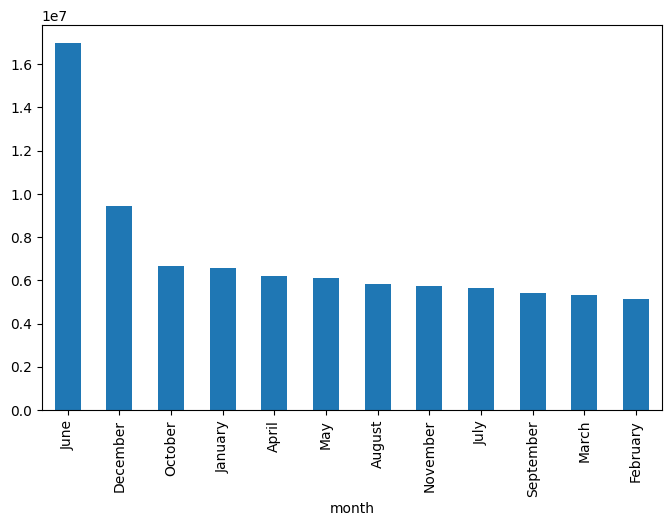

In [63]:
hyderabad.groupby('month')['visitors'].sum().sort_values(ascending = False).plot(kind = 'bar',figsize=(8,5))

In [58]:
hyderabad.groupby('month')['visitors'].sum().reset_index()

,month,visitors
0,April,6187334
1,August,5834736
2,December,9458632
3,February,5118208
4,January,6558551
5,July,5633143
6,June,16965307
7,March,5303984
8,May,6109590
9,November,5719659


In [64]:
hyderabad_pick_low = hyderabad.groupby('month')['visitors'].sum().reset_index()

## To get the months in order

In [65]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


hyderabad_pick_low['month'] = pd.Categorical(hyderabad_pick_low['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'months' column
hyderabad_pick_low = hyderabad_pick_low.sort_values('month')

In [66]:
hyderabad_pick_low

,month,visitors
4,January,6558551
3,February,5118208
7,March,5303984
0,April,6187334
8,May,6109590
6,June,16965307
5,July,5633143
1,August,5834736
11,September,5406363
10,October,6650351


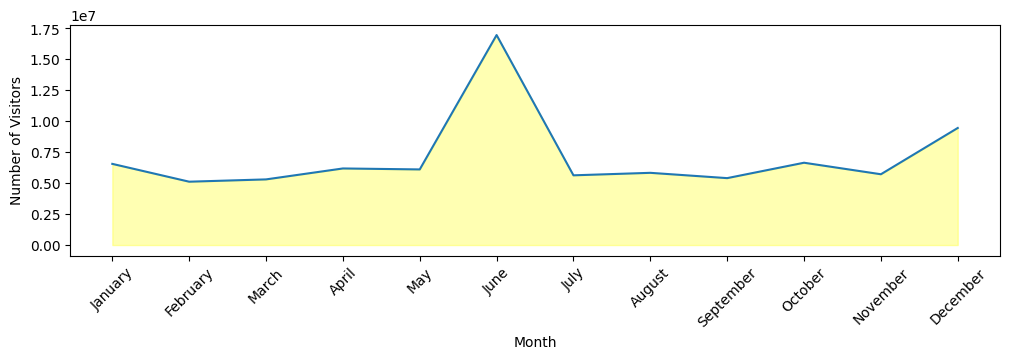

In [78]:
plt.figure(figsize=(12, 3))
sns.lineplot(x='month', y='visitors', data=hyderabad_pick_low)
plt.fill_between(hyderabad_pick_low['month'], hyderabad_pick_low['visitors'],color='yellow' ,alpha=0.3)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.show()